In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
data=pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:xlabel='Classification', ylabel='PW'>

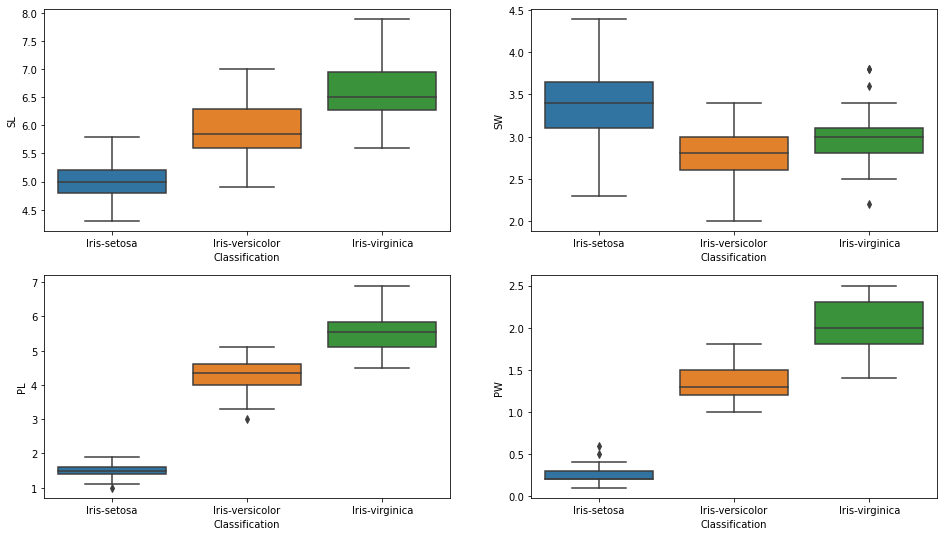

In [7]:
# ploting values in box plot
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y=data['SL'], x= 'Classification', data=data, ax=axes[0, 0])
sns.boxplot( y=data['SW'], x= 'Classification', data=data, ax=axes[0, 1])
sns.boxplot( y=data['PL'], x= 'Classification', data=data, ax=axes[1, 0])
sns.boxplot( y=data['PW'], x= 'Classification', data=data, ax=axes[1, 1])


# Handling Missing data

In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
data.SL.nunique()

35

In [10]:
data.SW.nunique()

23

In [11]:
data.PL.nunique()

43

In [12]:
data.PW.nunique()

22

In [13]:
for i in ['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].median())

In [14]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Outlier Detection

Text(0.5, 1.0, 'Box plot of Sepal Length')

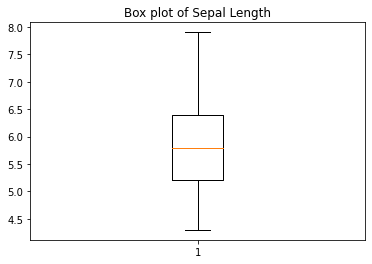

In [16]:
# Sepal Length
plt.boxplot(data['SL'])
plt.title('Box plot of Sepal Length')

In [17]:
# No Outliers

Text(0.5, 1.0, 'Box plot of Sepal Width')

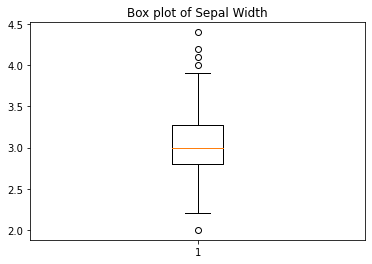

In [18]:
# Sepal Width
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal Width')

In [19]:
# Outliers are present.Manage using IQR

In [20]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [21]:
outlier=[]
for x in data['SW']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [22]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [23]:
ind1=data['SW']>up_limit
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [24]:
data.drop([14, 15, 32, 33],inplace=True)

Text(0.5, 1.0, 'Box plot of Sepal Width')

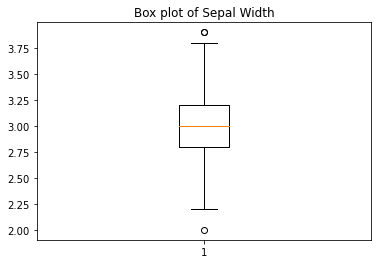

In [25]:
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal Width')

Text(0.5, 1.0, 'Box plot of Petal Length')

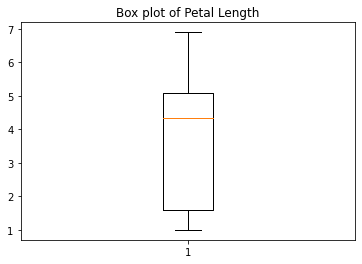

In [26]:
# Petal Length
plt.boxplot(data['PL'])
plt.title('Box plot of Petal Length')

In [27]:
# No Outliers

Text(0.5, 1.0, 'Box plot of Petal Width')

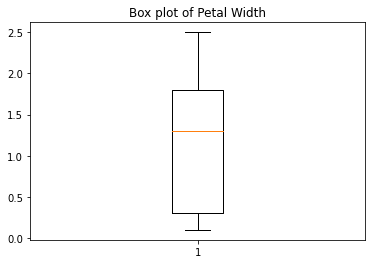

In [28]:
# Petal Width
plt.boxplot(data['PW'])
plt.title('Box plot of Petal Width')

In [29]:
# No Outliers

# Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [30]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
data['Classification'] = label_en.fit_transform(data['Classification'])

In [31]:
X = data.drop('Classification',axis=1)
y = data['Classification']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.2)

# Logistic Regression model

In [33]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

C:\Users\Dhanesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [35]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred, average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  0.9333333333333333
Precision is:  0.9333333333333333
Recall is:  0.9333333333333333
F1 score is:  0.9333333333333333


In [36]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# KNN Model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [38]:
acc_values

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

Text(0, 0.5, 'accuracy')

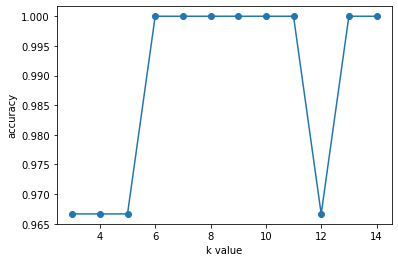

In [39]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [40]:
# The model shows highest of 1. And, is achieved for k values 6,7,8,9,10,11,13 and 14

In [41]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [42]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred,average = 'micro'))
print("Recall Score is :", recall_score(y_test,y_pred,average = 'micro'))
print("f1 Score is :", f1_score(y_test,y_pred,average = 'micro'))

Accuracy is : 1.0
Precision is : 1.0
Recall Score is : 1.0
f1 Score is : 1.0


In [43]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

In [44]:
data.describe()

,SL,SW,PL,PW,Classification
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.016438,3.845205,1.225342,1.027397
std,0.817166,0.382555,1.706593,0.755834,0.813212
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.125000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.200000,5.100000,1.800000,2.000000
max,7.900000,3.900000,6.900000,2.500000,2.000000


# SVM

In [53]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

In [54]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred, average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  0.9666666666666667
Precision is:  0.9666666666666667
Recall is:  0.9666666666666667
F1 score is:  0.9666666666666667


In [55]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

# Decision Tree Algorithm

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

In [46]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred, average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  0.9333333333333333
Precision is:  0.9333333333333333
Recall is:  0.9333333333333333
F1 score is:  0.9333333333333333


In [47]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# Rain Forest Algorithm

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [49]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred, average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  0.9333333333333333
Precision is:  0.9333333333333333
Recall is:  0.9333333333333333
F1 score is:  0.9333333333333333


In [50]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [ ]:
# SVM and KNN are the best suited Classification Algorithms 